## Malaria Detection Using CNN And Transfer Learning VGG19

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Train'
valid_path = 'Dataset/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
# useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:
# view the structure of the model
model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [10]:
from tensorflow.keras.layers import MaxPooling2D

In [11]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [15]:
training_set

In [16]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=100,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
13/13 [==============================] - 17s 1s/step - loss: 1.5440 - accuracy: 0.5264 - val_loss: 0.7627 - val_accuracy: 0.3209
Epoch 2/100
13/13 [==============================] - 17s 1s/step - loss: 0.6885 - accuracy: 0.5697 - val_loss: 0.7314 - val_accuracy: 0.3433
Epoch 3/100
13/13 [==============================] - 17s 1s/step - loss: 0.6629 - accuracy: 0.5841 - val_loss: 0.7383 - val_accuracy: 0.3731
Epoch 4/100
13/13 [==============================] - 17s 1s/step - loss: 0.6222 - accuracy: 0.6851 - val_loss: 0.7342 - val_accuracy: 0.4104
Epoch 5/100
13/13 [==============================] - 17s 1s/step - loss: 0.5486 - accuracy: 0.7452 - val_loss: 1.0547 - val_accuracy: 0.3209
Epoch 6/100
13/13 [==============================] - 18s 1s/step - loss: 0.6470 - accuracy: 0.6058 - val_loss: 0.7068 - val_accuracy: 0.4627
Epoch 7/100
13/13 [==============================] - 17s 1s/step - loss: 0.518

Epoch 57/100
13/13 [==============================] - 17s 1s/step - loss: 0.0427 - accuracy: 0.9832 - val_loss: 0.5087 - val_accuracy: 0.8209
Epoch 58/100
13/13 [==============================] - 17s 1s/step - loss: 0.1087 - accuracy: 0.9519 - val_loss: 0.3887 - val_accuracy: 0.8433
Epoch 59/100
13/13 [==============================] - 17s 1s/step - loss: 0.1025 - accuracy: 0.9591 - val_loss: 0.2494 - val_accuracy: 0.8955
Epoch 60/100
13/13 [==============================] - 17s 1s/step - loss: 0.0536 - accuracy: 0.9856 - val_loss: 0.2107 - val_accuracy: 0.8881
Epoch 61/100
13/13 [==============================] - 17s 1s/step - loss: 0.0344 - accuracy: 0.9904 - val_loss: 0.1631 - val_accuracy: 0.9104
Epoch 62/100
13/13 [==============================] - 17s 1s/step - loss: 0.0263 - accuracy: 0.9904 - val_loss: 0.0991 - val_accuracy: 0.9552
Epoch 63/100
13/13 [==============================] - 17s 1s/step - loss: 0.0758 - accuracy: 0.9736 - val_loss: 0.4590 - val_accuracy: 0.8358
Epoch 

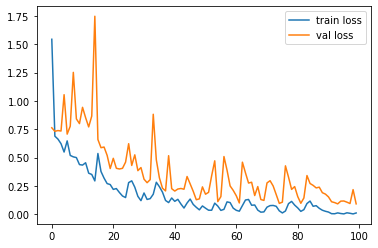

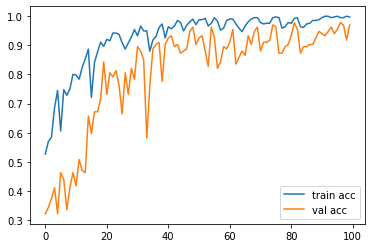

<Figure size 432x288 with 0 Axes>

In [18]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# save it as a h5 file

from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [20]:
y_pred = model.predict(test_set)

In [21]:
y_pred

array([[1.00000000e+00, 1.15727028e-09],
       [5.42608881e-03, 9.94573891e-01],
       [4.79931757e-02, 9.52006817e-01],
       [1.00000000e+00, 2.96493183e-28],
       [1.00000000e+00, 1.16934090e-16],
       [1.00000000e+00, 2.66796469e-22],
       [1.00000000e+00, 2.23982148e-08],
       [1.00000000e+00, 1.09653961e-11],
       [7.01443553e-01, 2.98556447e-01],
       [3.14288819e-03, 9.96857047e-01],
       [3.34426365e-03, 9.96655703e-01],
       [2.94956821e-03, 9.97050405e-01],
       [6.03386164e-02, 9.39661384e-01],
       [2.31844619e-01, 7.68155396e-01],
       [1.00000000e+00, 4.23128329e-14],
       [1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 3.98031265e-20],
       [9.99894977e-01, 1.05017782e-04],
       [3.24174851e-01, 6.75825119e-01],
       [1.00000000e+00, 5.12316058e-12],
       [1.00000000e+00, 7.77652776e-10],
       [1.00000000e+00, 0.00000000e+00],
       [9.21523664e-03, 9.90784764e-01],
       [1.00000000e+00, 2.16544858e-25],
       [1.000000

In [22]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [23]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0], dtype=int64)

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [25]:
model=load_model('model_vgg19.h5')

In [36]:
img=image.load_img('Dataset/Test/Parasite/3.png',target_size=(224,224))

In [37]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [38]:
x.shape

(224, 224, 3)

In [39]:
x=x/255

In [40]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [41]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [42]:
a=np.argmax(model.predict(img_data), axis=1)

In [45]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
